In [2]:
import os

import pandas as pd
from matplotlib.pyplot import savefig
import matplotlib.pyplot as plt
import seaborn as sns

from pot.network.storage import BlocksStorage, NodeStorage, TransactionStorage

In [4]:
storage_path = os.path.join('monitor', 'storage')
result_path = os.path.join('monitor', 'result')

In [5]:
def get_info_from_blockchain(path: str) -> dict:
    storage = BlocksStorage(path)
    blocks = storage.load()
    return {
        "len": len(blocks)
    }


def get_info_from_nodes(path: str) -> dict:
    storage = NodeStorage(path)
    nodes = storage.load()
    return {
        "len": len(nodes),
        "trust": {f"{node.identifier.hex}": 0 for node in nodes}
    }


def get_info_from_transactions_to_verify(path: str) -> dict:
    storage = TransactionStorage(path)
    txs = storage.load()
    return {
        "len": len(txs)
    }


def get_info_from_transactions_verified(path: str) -> dict:
    storage = TransactionStorage(path)
    txs = storage.load()
    return {
        "len": len(txs)
    }

In [9]:
cols_dict = {
    'time': 'Time',
    'number_of_nodes': 'Number of nodes',
    'node_trust': 'Node trust',
    'number_of_blocks': 'Number of blocks',
    'number_of_transaction_to_verify': 'Number of transactions to verifiy',
    'number_of_verified_transactions': 'Number of verified transactions',
}

cols = list(cols_dict.keys())

first_time = None
dfs = {}

In [10]:
for node in os.listdir(storage_path):
    # list all nodes in dir

    if node == '.gitignore':
        continue

    df = pd.DataFrame(columns=cols)
    df.set_index('time', inplace=True)

    dirs = [int(dir) for dir in os.listdir(os.path.join(storage_path, node))]
    dirs.sort()
    for time in dirs:
        # list all time in dir
        if not first_time:
            first_time = time

        storage_dir = os.path.join(storage_path, node, str(time))
        print(f"Processing dir {storage_dir}")

        try:
            blocks_info = get_info_from_blockchain(storage_dir)
            nodes_info = get_info_from_nodes(storage_dir)
            txs_to_ver_info = get_info_from_transactions_to_verify(storage_dir)
            txs_ver_info = get_info_from_transactions_verified(storage_dir)
        except Exception as e:
            # print(f"Exception {e} while loading from node: {node} from time {time}")
            raise e

        df.loc[time - first_time] = [
            nodes_info['len'],
            0,
            blocks_info['len'],
            txs_to_ver_info['len'],
            txs_ver_info['len']
        ]
    # check if all df has step by step info
    df.to_excel(os.path.join(result_path, f"result-{node}.xlsx"))
    dfs[node] = df

Processing dir monitor\storage\node0\1696066386
Processing dir monitor\storage\node0\1696066387
Processing dir monitor\storage\node0\1696066388
Processing dir monitor\storage\node0\1696066389
Processing dir monitor\storage\node0\1696066390
Processing dir monitor\storage\node0\1696066391
Processing dir monitor\storage\node0\1696066392
Processing dir monitor\storage\node0\1696066393
Processing dir monitor\storage\node0\1696066394
Processing dir monitor\storage\node0\1696066395
Processing dir monitor\storage\node0\1696066396
Processing dir monitor\storage\node0\1696066397
Processing dir monitor\storage\node0\1696066398
Processing dir monitor\storage\node0\1696066399
Processing dir monitor\storage\node0\1696066400
Processing dir monitor\storage\node0\1696066401
Processing dir monitor\storage\node0\1696066402
Processing dir monitor\storage\node0\1696066403
Processing dir monitor\storage\node0\1696066404
Processing dir monitor\storage\node0\1696066405
Processing dir monitor\storage\node0\169

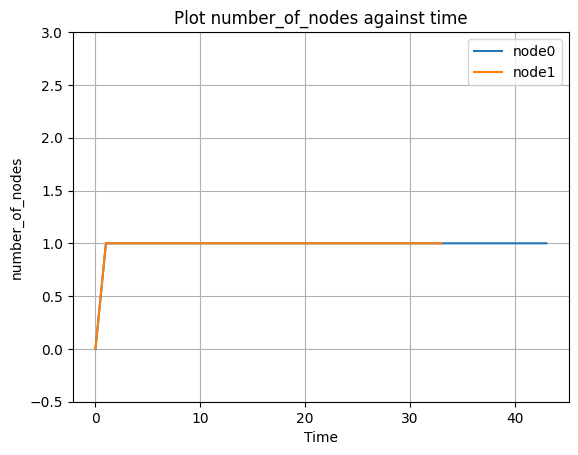

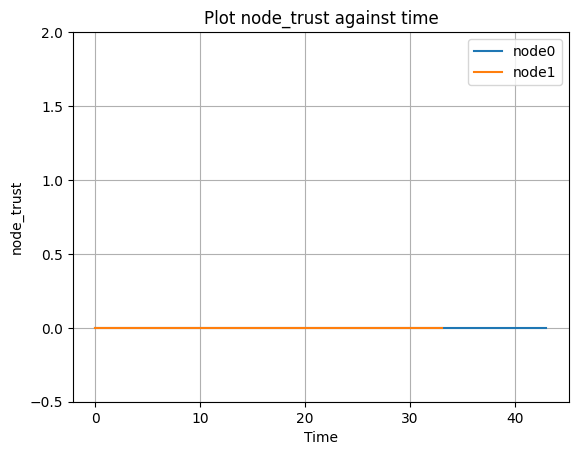

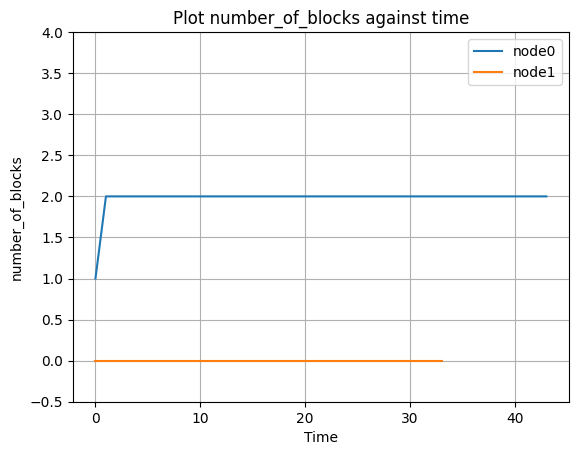

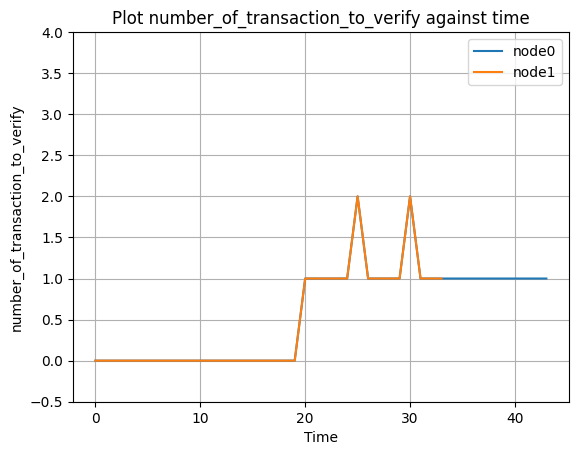

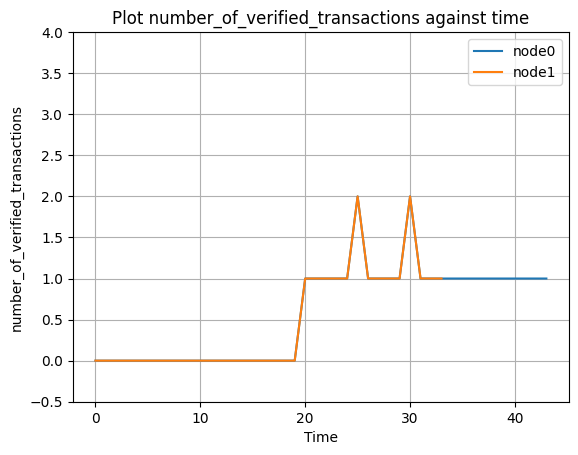

In [11]:
for col in cols[1:]:
    max_value = 0
    index = None
    data = {}
    for node, df in dfs.items():
        data[node] = df[col]
        if max_value < df[col].max():
            max_value = df[col].max()
        # if not index:
        #     index = df['time']

    df_show = pd.DataFrame(data)
    df_show.plot(
        legend=True,
        title=f"Plot {col} against time",
        xlabel="Time",
        ylabel=col,
#        subplots=True,
        ylim=(-0.5, max_value + 2),
        grid=True
    )
    savefig(os.path.join(result_path, f"plot-{col}.png"))